<a href="https://colab.research.google.com/github/oggyu/MachineLearning/blob/master/FashionMnistWithCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

import fashion Mnist data 

In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']
               
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))               

Number of training examples: 60000
Number of test examples:     10000


normalizing data

In [3]:
def normalize(images, labels):
  images = tf.cast(images,tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)


In [4]:

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache() 


make model and train 

In [5]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPool2D((2,2),strides = 2),
  tf.keras.layers.Conv2D(64,(3,3),padding='same',activation=tf.nn.relu),
  tf.keras.layers.MaxPool2D((2,2),strides=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10,activation=tf.nn.softmax)                             
])


In [6]:

model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

BATCH_SIZE = 32
train_dataset1 = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset1 = test_dataset.cache().batch(BATCH_SIZE)

model.fit(train_dataset1, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4796 - accuracy: 0.8566
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2704 - accuracy: 0.9002
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2346 - accuracy: 0.9122
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2125 - accuracy: 0.9208
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1954 - accuracy: 0.9280
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1743 - accuracy: 0.9356
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1614 - accuracy: 0.9398
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1470 - accuracy: 0.9447
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1383 - accuracy: 0.9487
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.125

In [7]:
tf.print(train_dataset)

<DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>


check accuracy 

In [8]:
test_loss, test_accuracy = model.evaluate(test_dataset1, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

for test_images, test_labels in test_dataset1.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images) 



313/313 [==============================] - 3s 8ms/step - loss: 0.3814 - accuracy: 0.9031
Accuracy on test dataset: 0.9031000137329102


In [9]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

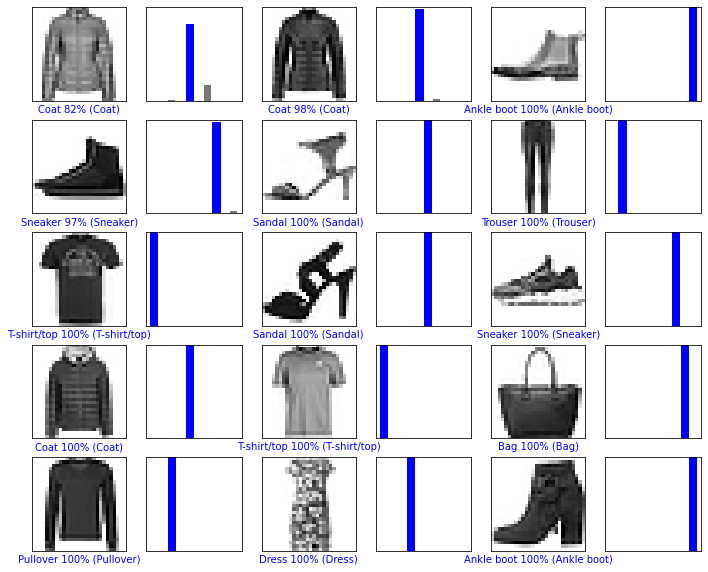

In [10]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


# Exercises 해보기 
*   Set training epochs set to 1
*  Number of neurons in the Dense layer following the Flatten one 10 and 512
*   Add additional Dense layers between the Flatten and the final Dense(10)
*   Don't normalize the pixel values, and see the effect that has

# Result
* 1 에서 10으로 순차적으로 늘였을 때 정확도가 처음에는 조금 증가하다가 낮아짐 오버피팅 해버림 
* 10으로 줄였을때 train data 에서 97% 였는데 94% 로 떨어짐 즉 오버피팅이 덜 됬다는 의미 하지만 test data 에서의 인식률도 조금 떨어졌다
*accuracy slightly decreased when one more dense layer was included not much difference 별차이 없음  
* training dataset 에서 정도가 조금 떨어졌지만 converging 속도 loss 가 떨어지는 속도가 느리다 
